![Logo](https://www.up.edu.mx/wp-content/themes/panamericana/img/logo-footer.png)

# **Series de tiempo 02**

## **Asignatura:** Econometría  
## **Profesora:** Mae. Julieta María Sarralde Vera

---

**Nombre del Alumno:**  
Luis Enrique Noguera Gil

**Fecha de entrega:**  
30 de septiembre de 2024


# Auto reload modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scripts.index as index
import fs

In [3]:
MAIN_DIR = fs.open_fs("../../data/raw/Class03")
DATA_DIR = MAIN_DIR.getsyspath("Harleys_Corner.xlsx")

In [4]:
# Librerías

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [10]:
df = pd.read_excel(DATA_DIR , header=0, sheet_name="Database")
df

,Respondent,Price,Product1,Product2,Product3,Product4,Product5,Product6,Channel1,Channel2,Promotion1,Promotion2,Promotion3,Packaging,Future_Prefer
0,1,5,4,4,4,4,4,5,3,3,4,3,3,3,4
1,2,5,4,4,4,4,3,5,3,3,4,3,3,3,4
2,3,5,4,4,4,4,4,5,3,3,4,3,3,3,4
3,4,5,4,4,4,4,3,5,3,3,4,3,3,5,4
4,5,5,4,4,4,4,4,5,3,3,4,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,3,4,3,4,5,4,5,3,3,3,3,3,3,5
296,297,3,4,3,4,5,3,5,3,3,3,3,3,3,5
297,298,3,4,3,4,5,3,5,3,3,3,3,3,3,5
298,299,3,4,3,4,5,4,5,3,4,3,3,3,3,5


<Axes: xlabel='Respondent', ylabel='Future_Prefer'>

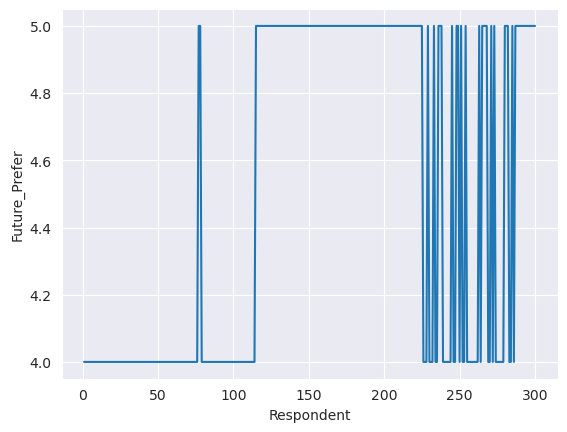

In [11]:
sns.lineplot(data=df, x='Respondent', y='Future_Prefer')

In [13]:
df.columns

Index(['Respondent', 'Price', 'Product1', 'Product2', 'Product3', 'Product4',
       'Product5', 'Product6', 'Channel1', 'Channel2', 'Promotion1',
       'Promotion2', 'Promotion3', 'Packaging', 'Future_Prefer'],
      dtype='object')

In [17]:
model_df = (
    smf.ols(
        formula='Future_Prefer ~ Price + Product1 + Product2 + Product3 + Product4 + Product5 + Product6 + Channel1 + Channel2 + Promotion1 + Promotion2 + Promotion3 + Packaging',
        data=df
    )
    .fit()
)

In [18]:
model_df.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.947    
Dependent Variable: Future_Prefer    AIC:                -429.4091
Date:               2024-09-30 21:51 BIC:                -377.5561
No. Observations:   300              Log-Likelihood:     228.70   
Df Model:           13               F-statistic:        409.4    
Df Residuals:       286              Prob (F-statistic): 3.14e-176
R-squared:          0.949            Scale:              0.013369 
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     11.3917    0.1560   73.0144  0.0000  11.0846  11.6988
Price         -0.1902    0.0134  -14.1600  0.0000  -0.2166  -0.1637
Product1      -0.0947    0.0248   -3.8162  0.0002  -0.1435  -0.0458
Product2      -1.0688    0.0410  -26.0468  0.0000  -1.1495  -0.9880
Product3      -0.1074    0.0270   -3.9839  0.0001  -0.1604  -0.0543
Product4      -0.4935    0.0198  -24.9035  0.0000  -0.5325  -0.4545
Product5       0.0532    0.0193    2.7636  0.0061   0.0153   0.0912
Product6      -0.0311    0.0107   -2.9118  0.0039  -0.0521  -0.0101
Channel1      -0.0036    0.0247   -0.1465  0.8836  -0.0523   0.0451
Channel2       0.0369    0.0239    1.5450  0.1234  -0.0101   0.0839
Promotion1    -0.0489    0.0272   -1.7994  0.0730  -0.1024   0.0046
Promotion2     0.1533    0.0210    7.3106  0.0000   0.1120   0.1946
Promotion3     0.0354    0.0208    1.6971  0.0908  -0.0056   0.0764
Packaging      0.0342    0.0171    1.9949  0.0470   0.0005   0.0679
------------------------------------------------------------------
Omnibus:             366.488      Durbin-Watson:         1.790    
Prob(Omnibus):       0.000        Jarque-Bera (JB):      42961.558
Skew:                -5.188       Prob(JB):              0.000    
Kurtosis:            60.700       Condition No.:         321      
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [19]:
df2 = df.drop(columns=['Future_Prefer', 'Respondent']).copy()

In [20]:
model_df.get_prediction(df2)

In [22]:
predictions = model_df.get_prediction(df2)
predicted_values = predictions.predicted_mean
df['des_model'] = predicted_values
df

,Respondent,Price,Product1,Product2,Product3,Product4,Product5,Product6,Channel1,Channel2,Promotion1,Promotion2,Promotion3,Packaging,Future_Prefer,des_model
0,1,5,4,4,4,4,4,5,3,3,4,3,3,3,4,4.013744
1,2,5,4,4,4,4,3,5,3,3,4,3,3,3,4,3.960501
2,3,5,4,4,4,4,4,5,3,3,4,3,3,3,4,4.013744
3,4,5,4,4,4,4,3,5,3,3,4,3,3,5,4,4.028832
4,5,5,4,4,4,4,4,5,3,3,4,3,3,3,4,4.013744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,3,4,3,4,5,4,5,3,3,3,3,3,3,5,5.018221
296,297,3,4,3,4,5,3,5,3,3,3,3,3,3,5,4.964978
297,298,3,4,3,4,5,3,5,3,3,3,3,3,3,5,4.964978
298,299,3,4,3,4,5,4,5,3,4,3,3,3,3,5,5.055099
